In [1]:
from bs4 import BeautifulSoup    #200 respone successs response   parse garne tanne
import requests
url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
soup=requests.get(url)
soup


C:\Users\HP\anaconda\lib\site-packages\bs4\__init__.py:431: MarkupResemblesLocatorWarning: "https://www.worldometers.info/coronavirus/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


<Response [200]>

'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>COVID Live - Coronavirus Statistics - Worldometer</title>\n<meta name="description" content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates">\n\n<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple
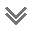

In [2]:
code=soup.text   #source code tandinxa
code

In [ ]:
lxml_code=BeautifulSoup(code, "lxml") #browser le bujne format large xml file
lxml_code


In [ ]:
lxml_code.table

In [ ]:
table=lxml_code.table

In [ ]:
tag=table.find_all('tr')    #list ko form ma ayera baseko xa
tag

In [ ]:
tag[0]

In [ ]:
tag[0].text

In [ ]:
tag[0].text.split('\n')   #euta line ko ayo but multiple lina xa

In [ ]:
for i in range(len(tag)):    #sabai ko value nikalana range use gariyo  list ko format ma ayo sabai data
    print(tag[i].text.split('\n')[1:-1])

In [ ]:
#mathi ra talako hataune  slicing garnu paryo
#csv file ma change garne

In [ ]:
output=[]
for i in range(len(tag)):    
    datas=tag[i].text.split('\n')[1:-1]
    if datas[0]!='':
        output.append(datas)
output
    

In [ ]:
import csv
file=open('covids_data.csv','w')
x=csv.writer(file)
for i in output:
    x.writerow(i)

In [ ]:
import pandas as pd
df=pd.read_csv('covids_data.csv',encoding="ISO-8859-1")
df


In [1]:
import plotly.graph_objects as go
fig = go.Figure([go.Bar(x=df['Country,Other'], y=df['TotalDeaths'])])
fig.show()

NameError: name 'df' is not defined

In [ ]:
import plotly.graph_objects as go
death=df['TotalDeaths'][0:10]
new_death=[]
new_country=df['Country,Other'][0:10]

for i in death:
    new_death.append(int(i.replace(',','')))
print(new_death)
    

fig = go.Figure([go.Bar(x=new_country, y=new_death)])
fig.show()

In [ ]:
import plotly.graph_objects as go

x = new_country
y = new_death

fig = go.Figure(data=[go.Pie(labels=x, values=y)])
fig.show()


In [9]:
from bs4 import BeautifulSoup    #200 respone successs response   parse garne tanne
import requests
for i in range(1,6):
    url = BeautifulSoup('https://www.worldometers.info/coronavirus/', 'html.parser')
    soup=requests.get(url)
    soup.text
